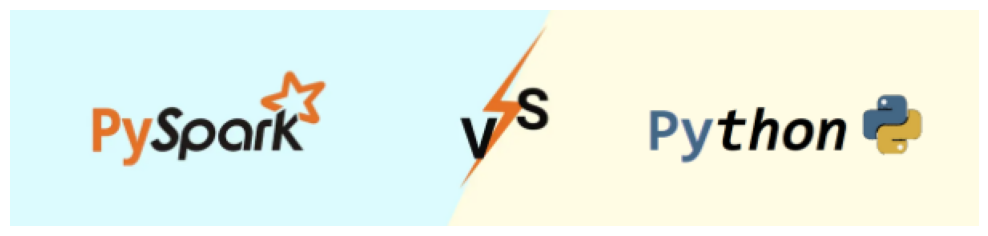

In [1]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# ID do arquivo no Google Drive
file_id = '16o7sjsXIF5zkyN3aDkPer5hM_D70JLN8'

# URL de download direto
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'



# Fazer o download da imagem
response = requests.get(download_url)
img = Image.open(BytesIO(response.content))

# Ajustar o tamanho da figura
plt.figure(figsize=(12.5, 27))  # Aqui você pode ajustar o tamanho conforme necessário

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Desativar os eixos
plt.show()

# <center><font color="#cd7f32"> Mini Case PySpark </font>
# <center> Jump Start 

## Descrição do projeto
----

<strong>Escolher uma questão do case pandas, refazer utilizando PySpark e fazer as seguintes análises:</strong>

- Qual ferramenta foi mais performática? 
- Existiu diferença de performance entre spark.sql e pyspark puro?
- É possível otimizar os arquivos? Utilizando outro formato, criando particionamento e etc.
- Faça uma pesquisa sobre particionamento no pyspark e como isso pode impactar na performance para análise de bigdata.

<strong>Fiquem à vontade para explorar a criatividade, utilizar arquivos maiores do imdb e testar se o pyspark viabiliza o uso.</strong>

----

### O Que é Particionamento?

Particionamento é a forma como o PySpark divide um grande conjunto de dados em partes menores, chamadas de "partições", para processá-las de forma distribuída. Cada partição é um pedaço de dados que pode ser processado independentemente em paralelo. A ideia é distribuir a carga de trabalho entre diferentes nós de um cluster, para acelerar o processamento e tornar a análise de big data mais eficiente.

### Como o Particionamento Funciona no PySpark

1. **Partições de RDD**: No PySpark, os dados são representados por RDDs (Resilient Distributed Datasets). Um RDD é dividido em várias partições, que são processadas em paralelo. O número de partições pode ser ajustado para otimizar a performance.

2. **DataFrames e Datasets**: Para DataFrames e Datasets, o particionamento é um pouco mais abstrato, mas o princípio é o mesmo. Dados são divididos em partições para serem processados em paralelo.

3. **Paralelismo e Distribuição**: As partições são distribuídas entre os diferentes nós do cluster, permitindo que múltiplas operações sejam realizadas em paralelo. Isso é essencial para escalar o processamento de dados.

### Como Configurar o Particionamento

1. **Número de Partições**: Você pode definir o número de partições ao criar um RDD, usar a função `repartition()` ou `coalesce()` em DataFrames. O `repartition()` aumenta ou diminui o número de partições e pode causar um shuffle (redistribuição dos dados), enquanto o `coalesce()` é mais eficiente para reduzir o número de partições sem shuffle.

   ```python
   # Exemplo de reparticionamento
   df = df.repartition(10)
   ```

2. **Coluna de Particionamento**: Ao usar operações como `groupBy` ou `join`, você pode particionar os dados com base em uma coluna específica. Isso pode melhorar a eficiência do processamento, especialmente se os dados são frequentemente agrupados ou filtrados com base nessa coluna.

   ```python
   # Exemplo de particionamento por coluna
   df = df.repartition('column_name')
   ```

### Impacto na Performance

1. **Redução de Shuffle**: O particionamento adequado pode reduzir a quantidade de shuffle necessário. O shuffle ocorre quando os dados precisam ser redistribuídos entre diferentes partições e pode ser um processo caro em termos de tempo e recursos.

2. **Balanceamento de Carga**: Se as partições forem muito grandes ou muito pequenas, isso pode causar um balanceamento desigual da carga de trabalho entre os nós do cluster. O particionamento adequado ajuda a garantir que cada nó esteja trabalhando com uma quantidade equilibrada de dados.

3. **Melhoria da Localidade dos Dados**: Particionamento pode melhorar a localidade dos dados, ou seja, dados que são frequentemente acessados juntos são colocados na mesma partição. Isso reduz o tempo de acesso e melhora a eficiência.

4. **Performance de Operações**: Operações como `join`, `groupBy`, e `aggregate` podem ser muito mais eficientes quando o particionamento é feito com base nas colunas relevantes. Isso minimiza a quantidade de dados que precisam ser movidos entre partições.

5. **Efeito da Persistência**: Se você estiver persistindo dados em memória (`cache()` ou `persist()`), o particionamento adequado também pode impactar a eficiência do armazenamento e recuperação desses dados.

### Boas Práticas para Particionamento

1. **Ajustar o Número de Partições**: O número ideal de partições depende do tamanho dos dados e dos recursos disponíveis no cluster. Testar e ajustar o número de partições pode melhorar a performance.

2. **Evitar Partições Pequenas**: Partições muito pequenas podem resultar em overhead excessivo. O ideal é ter um número razoável de partições, onde cada uma contém uma quantidade significativa de dados.

3. **Escolher Colunas Adequadas para Particionamento**: Ao particionar com base em uma coluna, escolha uma coluna que distribua os dados de maneira uniforme e que seja frequentemente usada em operações de agrupamento ou junção.

4. **Monitorar e Ajustar**: Utilize ferramentas de monitoramento do Spark para analisar a performance e ajustar o particionamento conforme necessário.

### Conclusão

O particionamento é uma ferramenta poderosa no PySpark para otimizar o processamento de grandes volumes de dados. Um particionamento eficaz pode reduzir o tempo de processamento, melhorar o balanceamento de carga e minimizar o custo de operações de shuffle. Com uma compreensão adequada e a aplicação de boas práticas, você pode maximizar a eficiência das suas análises em big data.


# Pandas:

In [8]:
import pandas as pd
import gzip
import warnings
from multiprocessing import Pool, cpu_count
import time

warnings.filterwarnings('ignore')

CONCURRENCY = cpu_count()

def carregar_exibir_arquivo(caminho_arquivo, tempos_execucao):
    """Carregar arquivo TSV compactado e substituir '\\N' por NaN"""
    start_time = time.time()
    df = pd.read_csv(caminho_arquivo, compression='gzip', delimiter='\t', encoding='utf-8', low_memory=False)
    df.replace('\\N', pd.NA, inplace=True)
    took = time.time() - start_time
    tempos_execucao.append(('carregar_exibir_arquivo', took))
    return df

# Lista de caminhos dos arquivos
arquivos = [
    "title.basics.tsv.gz",
    "title.ratings.tsv.gz",   
]

# Dicionário para armazenar os DataFrames
dataframes = {}
tempos_execucao = []

# Carregar e exibir cada arquivo
start_time = time.time()
for arquivo in arquivos:
    df = carregar_exibir_arquivo(arquivo, tempos_execucao)
    nome_df = arquivo.split('/')[-1].replace('.tsv.gz', '').replace('.', '_')
    dataframes[nome_df] = df
tempos_execucao.append(('total_carregar_exibir_arquivos', time.time() - start_time))


# Processamento do DataFrame title_basics
start_time = time.time()
df_basics = dataframes["title_basics"]

# Exclusão das colunas que não serão usadas
colunas_para_excluir = ['isAdult', 'endYear', 'runtimeMinutes', 'genres', 'originalTitle']
df_basics.drop(columns=colunas_para_excluir, inplace=True)

# Renomeando as colunas para PT
new_column_names = {
    'tconst': 'id_titulo',
    'titleType': 'categoria',
    'primaryTitle': 'titulo_principal',
    'startYear': 'ano'
}
df_basics.rename(columns=new_column_names, inplace=True)

# Transformando a coluna 'ano' de object para inteiro
df_basics['ano'] = pd.to_numeric(df_basics['ano'], errors='coerce').astype('Int64')

# Filtrando para deixar apenas o necessário para a análise
df_basics = df_basics[df_basics['categoria'] == 'movie']
df_basics = df_basics[df_basics['ano'] <= 2024]
tempos_execucao.append(('processar_title_basics', time.time() - start_time))

# Processamento do DataFrame title_ratings
start_time = time.time()
df_ratings = dataframes["title_ratings"]

new_column_names = {
    'tconst': 'id_titulo',
    'averageRating': 'media_avaliacoes',
    'numVotes': 'num_votos',
}
df_ratings.rename(columns=new_column_names, inplace=True)
tempos_execucao.append(('processar_title_ratings', time.time() - start_time))

# Junção dos DataFrames
start_time = time.time()
df_filmes = pd.merge(df_basics, df_ratings, on="id_titulo", how="inner")
tempos_execucao.append(('juntar_dataframes', time.time() - start_time))

# Ordenação e seleção dos melhores filmes
start_time = time.time()
df_filmes_top = df_filmes.sort_values(by=['num_votos', 'media_avaliacoes'], ascending=[False, False]).head(15)
tempos_execucao.append(('selecionar_melhores_filmes', time.time() - start_time))

print("Top 15 Melhores Filmes:")
display(df_filmes_top[['titulo_principal', 'num_votos', 'media_avaliacoes']])

# Ordenação e seleção dos piores filmes
start_time = time.time()
df_filmes_piores = df_filmes.sort_values(by=['media_avaliacoes', 'num_votos'], ascending=[True, False]).head(15)
tempos_execucao.append(('selecionar_piores_filmes', time.time() - start_time))

print("\n15 Piores Filmes:")
display(df_filmes_piores[['titulo_principal', 'num_votos', 'media_avaliacoes']])

if __name__ == "__main__":
    print("Iniciando o processamento do arquivo.")
    start_time = time.time()

    # Exemplo de função de processamento - precisa definir o nome do arquivo
    def df_pandas(filename, chunksize=100000):
        # Usando chunksize para processar em partes menores
        chunk_list = []
        start_time = time.time()
        with gzip.open(filename, 'rt', encoding='utf-8') as file:
            for chunk in pd.read_csv(file, delimiter='\t', chunksize=chunksize):
                chunk_list.append(chunk)
        df = pd.concat(chunk_list)
        took = time.time() - start_time
        print(f"Tempo para criar DataFrame com Pandas: {took:.2f} sec")
        return df
    
    # Define o arquivo a ser processado
    filename = "title.basics.tsv.gz"
    total_linhas = sum(1 for _ in gzip.open(filename, 'rt', encoding='utf-8')) - 1  # subtrai 1 para a linha de cabeçalho

    df = df_pandas(filename, chunksize=100000)
    took = time.time() - start_time

    display(df.head())
    print(f"O processamento levou: {took:.2f} seg")

# Armazenar os tempos de execução em um DataFrame
df_tempos_pandas = pd.DataFrame(tempos_execucao, columns=['etapa', 'tempo'])


Top 15 Melhores Filmes:


,titulo_principal,num_votos,media_avaliacoes
62339,The Shawshank Redemption,2920811,9.3
138362,The Dark Knight,2901760,9.0
179898,Inception,2577377,8.8
72342,Fight Club,2353264,8.8
61606,Forrest Gump,2284287,8.8
62192,Pulp Fiction,2244214,8.9
144221,Interstellar,2135934,8.7
71059,The Matrix,2075217,8.7
37470,The Godfather,2035423,9.2
67025,The Lord of the Rings: The Fellowship of the Ring,2028196,8.9



15 Piores Filmes:


,titulo_principal,num_votos,media_avaliacoes
284846,Reis,74113,1.0
296207,Cumali Ceber: Allah Seni Alsin,39422,1.0
177310,321 Action,10182,1.0
180096,2025 - The World enslaved by a Virus,2560,1.0
204435,Holnap történt - A nagy bulvárfilm,968,1.0
162294,Laz Kit,866,1.0
193542,Cumali Ceber 666,847,1.0
274011,Chun jie xin ling: Zhu meng yan yi quan,725,1.0
209702,Kamifûsen,542,1.0
151627,Konjaku monogatari: The new edition,533,1.0


Iniciando o processamento do arquivo.
Tempo para criar DataFrame com Pandas: 36.72 sec


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


O processamento levou: 48.46 seg


# Spark.SQL

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
import time
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar a SparkSession
spark = SparkSession.builder \
    .appName("IMDB Data Processing") \
    .getOrCreate()

# Função para carregar e registrar o DataFrame como uma tabela temporária
def carregar_exibir_arquivo(spark, caminho_arquivo, nome_tabela, tempos_execucao):
    start_time = time.time()
    df = spark.read.csv(caminho_arquivo, sep='\t', header=True, inferSchema=True)
    df = df.replace('\\N', None)
    df.createOrReplaceTempView(nome_tabela)
    took = time.time() - start_time
    tempos_execucao.append(("Carregar e Registrar " + nome_tabela, took))
    print(f"Tempo de carregamento e registro para {nome_tabela}: {took:.2f} sec")
    return df

# Lista de caminhos dos arquivos e nomes das tabelas
arquivos = [
    ("title.basics.tsv.gz", "title_basics"),
    ("title.ratings.tsv.gz", "title_ratings"),
]

# Dicionário para armazenar os tempos de execução
tempos_execucao = []

# Carregar e registrar cada arquivo como tabela temporária
start_time = time.time()
for arquivo, nome_tabela in arquivos:
    carregar_exibir_arquivo(spark, arquivo, nome_tabela, tempos_execucao)
total_time = time.time() - start_time
tempos_execucao.append(("Total Carregamento e Registro", total_time))
print(f"Tempo total de carregamento e registro: {total_time:.2f} sec\n")

# Filtragem e manipulação de dados usando SQL
start_time = time.time()
spark.sql("""
    CREATE OR REPLACE TEMP VIEW filtered_title_basics AS
    SELECT 
        tconst AS id_titulo,
        primaryTitle AS titulo_principal,
        startYear AS ano
    FROM title_basics
    WHERE titleType = 'movie' AND startYear <= 2024
""")
took = time.time() - start_time
tempos_execucao.append(("Filtragem e Manipulação de Dados", took))
print(f"Tempo para filtragem e manipulação de dados: {took:.2f} sec")

# Transformando a coluna 'ano' de string para inteiro
start_time = time.time()
spark.sql("""
    CREATE OR REPLACE TEMP VIEW final_title_basics AS
    SELECT 
        id_titulo,
        titulo_principal,
        CAST(ano AS INT) AS ano
    FROM filtered_title_basics
""")
took = time.time() - start_time
tempos_execucao.append(("Transformar 'ano' em Inteiro", took))
print(f"Tempo para transformar 'ano' em inteiro: {took:.2f} sec")

# Junção dos DataFrames e ordenação
start_time = time.time()
df_filmes = spark.sql("""
    SELECT 
        b.id_titulo,
        b.titulo_principal,
        b.ano,
        r.averageRating AS media_avaliacoes,
        r.numVotes AS num_votos
    FROM final_title_basics b
    JOIN title_ratings r ON b.id_titulo = r.tconst
""")
df_filmes.createOrReplaceTempView("filmes")
took = time.time() - start_time
tempos_execucao.append(("Junção dos DataFrames", took))
print(f"Tempo para junção dos DataFrames: {took:.2f} sec")

# Ordenação e seleção dos melhores filmes
start_time = time.time()
df_filmes_top = spark.sql("""
    SELECT 
        titulo_principal,
        num_votos,
        media_avaliacoes
    FROM filmes
    ORDER BY num_votos DESC, media_avaliacoes DESC
    LIMIT 15
""")
took = time.time() - start_time
tempos_execucao.append(("Ordenar e Selecionar Melhores Filmes", took))
print(f"Tempo para ordenar e selecionar melhores filmes: {took:.2f} sec")

print("Top 15 Melhores Filmes:")
df_filmes_top.show()

# Ordenação e seleção dos piores filmes
start_time = time.time()
df_filmes_piores = spark.sql("""
    SELECT 
        titulo_principal,
        num_votos,
        media_avaliacoes
    FROM filmes
    ORDER BY media_avaliacoes ASC, num_votos DESC
    LIMIT 15
""")
took = time.time() - start_time

tempos_execucao.append(("Ordenar e Selecionar Piores Filmes", took))
print(f"Tempo para ordenar e selecionar piores filmes: {took:.2f} sec")

print("\n15 Piores Filmes:")
df_filmes_piores.show()

# Criando DataFrame dos tempos de execução
df_tempos_pysparksql = pd.DataFrame(tempos_execucao, columns=["Etapa", "Tempo (s)"])

# Salvando DataFrame para possível uso posterior
df_tempos_pysparksql.to_csv("tempos_execucao_spark.csv", index=False)


if __name__ == "__main__":
    start_time = time.time()

    # Exemplo de função de processamento - precisa definir o nome do arquivo
    def create_df_with_spark(spark, filename):
        start_time = time.time()
        df = spark.read.csv(filename, sep='\t', header=True, inferSchema=True)
        took = time.time() - start_time
        print(f"Tempo para carregar o DataFrame: {took:.2f} sec")
        return df
    
    # Define o arquivo a ser processado
    filename = "title.basics.tsv.gz"

    df = create_df_with_spark(spark, filename)
    df.show(5)
    print(f"O processamento levou: {time.time() - start_time:.2f} seg")


Tempo de carregamento e registro para title_basics: 28.09 sec
Tempo de carregamento e registro para title_ratings: 3.13 sec
Tempo total de carregamento e registro: 31.23 sec

Tempo para filtragem e manipulação de dados: 0.48 sec
Tempo para transformar 'ano' em inteiro: 0.09 sec
Tempo para junção dos DataFrames: 0.13 sec
Tempo para ordenar e selecionar melhores filmes: 0.05 sec
Top 15 Melhores Filmes:
+--------------------+---------+----------------+
|    titulo_principal|num_votos|media_avaliacoes|
+--------------------+---------+----------------+
|The Shawshank Red...|  2920811|             9.3|
|     The Dark Knight|  2901760|             9.0|
|           Inception|  2577377|             8.8|
|          Fight Club|  2353264|             8.8|
|        Forrest Gump|  2284287|             8.8|
|        Pulp Fiction|  2244214|             8.9|
|        Interstellar|  2135934|             8.7|
|          The Matrix|  2075217|             8.7|
|       The Godfather|  2035423|             9

# Pyspark Puro

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
import time
import pandas as pd


# Inicializar a SparkSession
spark = SparkSession.builder \
    .appName("IMDB Data Processing") \
    .getOrCreate()

# Função para carregar e exibir o arquivo
def carregar_exibir_arquivo(spark, caminho_arquivo):
    df = spark.read.csv(caminho_arquivo, sep='\t', header=True, inferSchema=True)
    df = df.replace('\\N', None)
    return df

# Lista de caminhos dos arquivos
arquivos = [
    "title.basics.tsv.gz",
    "title.ratings.tsv.gz",
]

# Dicionário para armazenar os DataFrames
dataframes = {}

# Dicionário para armazenar os tempos de execução
tempos_execucao = []

# Medir o tempo de carregamento dos arquivos
start_time = time.time()
for arquivo in arquivos:
    etapa_start_time = time.time()
    df = carregar_exibir_arquivo(spark, arquivo)
    nome_df = arquivo.split('/')[-1].replace('.tsv.gz', '').replace('.', '_')
    dataframes[nome_df] = df
    took = time.time() - etapa_start_time
    tempos_execucao.append(("Carregar " + nome_df, took))
    print(f"Tempo de carregamento para {arquivo}: {took:.2f} sec")
total_time = time.time() - start_time
tempos_execucao.append(("Total Carregamento", total_time))
print(f"Tempo total de carregamento: {total_time:.2f} sec\n")

# Para ver o nome dos DataFrames carregados
for nome, df in dataframes.items():
    print(f"DataFrame name: {nome}")

# Processamento dos dados básicos
start_time = time.time()
df_basics = dataframes["title_basics"]

# Exclusão das colunas que não serão usadas
etapa_start_time = time.time()
colunas_para_excluir = ['isAdult', 'endYear', 'runtimeMinutes', 'genres', 'originalTitle']
df_basics = df_basics.drop(*colunas_para_excluir)
tempos_execucao.append(("Excluir Colunas", time.time() - etapa_start_time))
print(f"Tempo para exclusão de colunas: {tempos_execucao[-1][1]:.2f} sec")

# Renomeando as colunas para PT
etapa_start_time = time.time()
new_column_names = {
    'tconst': 'id_titulo',
    'titleType': 'categoria',
    'primaryTitle': 'titulo_principal',
    'startYear': 'ano'
}
for old_name, new_name in new_column_names.items():
    df_basics = df_basics.withColumnRenamed(old_name, new_name)
tempos_execucao.append(("Renomear Colunas", time.time() - etapa_start_time))
print(f"Tempo para renomear colunas: {tempos_execucao[-1][1]:.2f} sec")

# Transformando a coluna 'ano' de string para inteiro
etapa_start_time = time.time()
df_basics = df_basics.withColumn('ano', col('ano').cast(IntegerType()))
tempos_execucao.append(("Transformar 'ano' em Inteiro", time.time() - etapa_start_time))
print(f"Tempo para transformar 'ano' em inteiro: {tempos_execucao[-1][1]:.2f} sec")

# Filtrando para deixar apenas o necessário para a análise
etapa_start_time = time.time()
df_basics = df_basics.filter((col('categoria') == 'movie') & (col('ano') <= 2024))
tempos_execucao.append(("Filtrar Dados", time.time() - etapa_start_time))
print(f"Tempo para filtrar dados: {tempos_execucao[-1][1]:.2f} sec\n")

# Processamento dos dados de ratings
start_time = time.time()
df_ratings = dataframes["title_ratings"]

etapa_start_time = time.time()
new_column_names = {
    'tconst': 'id_titulo',
    'averageRating': 'media_avaliacoes',
    'numVotes': 'num_votos',
}
for old_name, new_name in new_column_names.items():
    df_ratings = df_ratings.withColumnRenamed(old_name, new_name)
tempos_execucao.append(("Processar Ratings", time.time() - etapa_start_time))
print(f"Tempo para processar ratings: {tempos_execucao[-1][1]:.2f} sec")

# Junção dos DataFrames
etapa_start_time = time.time()
df_filmes = df_basics.join(df_ratings, on="id_titulo", how="inner")
tempos_execucao.append(("Junção dos DataFrames", time.time() - etapa_start_time))
print(f"Tempo para junção dos DataFrames: {tempos_execucao[-1][1]:.2f} sec")

# Ordenação e seleção dos melhores filmes
etapa_start_time = time.time()
df_filmes_top = df_filmes.orderBy(col('num_votos').desc(), col('media_avaliacoes').desc()).limit(15)
tempos_execucao.append(("Ordenar e Selecionar Melhores Filmes", time.time() - etapa_start_time))
print(f"Tempo para ordenar e selecionar melhores filmes: {tempos_execucao[-1][1]:.2f} sec")

print("Top 15 Melhores Filmes:")
df_filmes_top.select('titulo_principal', 'num_votos', 'media_avaliacoes').show()

# Ordenação e seleção dos piores filmes
etapa_start_time = time.time()
df_filmes_piores = df_filmes.orderBy(col('media_avaliacoes').asc(), col('num_votos').desc()).limit(15)
tempos_execucao.append(("Ordenar e Selecionar Piores Filmes", time.time() - etapa_start_time))
print(f"Tempo para ordenar e selecionar piores filmes: {tempos_execucao[-1][1]:.2f} sec")

print("\n15 Piores Filmes:")
df_filmes_piores.select('titulo_principal', 'num_votos', 'media_avaliacoes').show()

# Criando DataFrame dos tempos de execução
df_tempos = pd.DataFrame(tempos_execucao, columns=["Etapa", "Tempo (s)"])

# Salvando DataFrame para possível uso posterior
df_tempos.to_csv("tempos_execucao_pyspark.csv", index=False)

if __name__ == "__main__":
    print("Iniciando o processamento do arquivo.")
    start_time = time.time()

    # Exemplo de função de processamento - precisa definir o nome do arquivo
    def create_df_with_spark(spark, filename):
        df = spark.read.csv(filename, sep='\t', header=True, inferSchema=True)
        return df
    
    # Define o arquivo a ser processado
    filename = "title.basics.tsv.gz"

    df = create_df_with_spark(spark, filename)
    took = time.time() - start_time

    df.show(5)
    print(f"O processamento levou: {took:.2f} sec")


Tempo de carregamento para title.basics.tsv.gz: 33.20 sec
Tempo de carregamento para title.ratings.tsv.gz: 2.99 sec
Tempo total de carregamento: 36.19 sec

DataFrame name: title_basics
DataFrame name: title_ratings
Tempo para exclusão de colunas: 0.01 sec
Tempo para renomear colunas: 0.03 sec
Tempo para transformar 'ano' em inteiro: 0.05 sec
Tempo para filtrar dados: 0.02 sec

Tempo para processar ratings: 0.02 sec
Tempo para junção dos DataFrames: 0.04 sec
Tempo para ordenar e selecionar melhores filmes: 0.04 sec
Top 15 Melhores Filmes:
+--------------------+---------+----------------+
|    titulo_principal|num_votos|media_avaliacoes|
+--------------------+---------+----------------+
|The Shawshank Red...|  2920811|             9.3|
|     The Dark Knight|  2901760|             9.0|
|           Inception|  2577377|             8.8|
|          Fight Club|  2353264|             8.8|
|        Forrest Gump|  2284287|             8.8|
|        Pulp Fiction|  2244214|             8.9|
|     

In [13]:
print(df_tempos_pandas )

                            etapa      tempo
0         carregar_exibir_arquivo  47.297245
1         carregar_exibir_arquivo   1.640814
2  total_carregar_exibir_arquivos  48.938060
3          processar_title_basics  12.482277
4         processar_title_ratings   0.000998
5               juntar_dataframes   1.414364
6      selecionar_melhores_filmes   0.122672
7        selecionar_piores_filmes   0.122710


In [14]:
print(df_tempos_pysparksql )

                                  Etapa  Tempo (s)
0     Carregar e Registrar title_basics  28.092830
1    Carregar e Registrar title_ratings   3.133401
2         Total Carregamento e Registro  31.226231
3      Filtragem e Manipulação de Dados   0.480983
4          Transformar 'ano' em Inteiro   0.088773
5                 Junção dos DataFrames   0.125653
6  Ordenar e Selecionar Melhores Filmes   0.054856
7    Ordenar e Selecionar Piores Filmes   0.030918


In [15]:
print(df_tempos)

                                   Etapa  Tempo (s)
0                  Carregar title_basics  33.196675
1                 Carregar title_ratings   2.994590
2                     Total Carregamento  36.192263
3                        Excluir Colunas   0.011924
4                       Renomear Colunas   0.026927
5           Transformar 'ano' em Inteiro   0.053864
6                          Filtrar Dados   0.015953
7                      Processar Ratings   0.015949
8                  Junção dos DataFrames   0.037903
9   Ordenar e Selecionar Melhores Filmes   0.040886
10    Ordenar e Selecionar Piores Filmes   0.010451


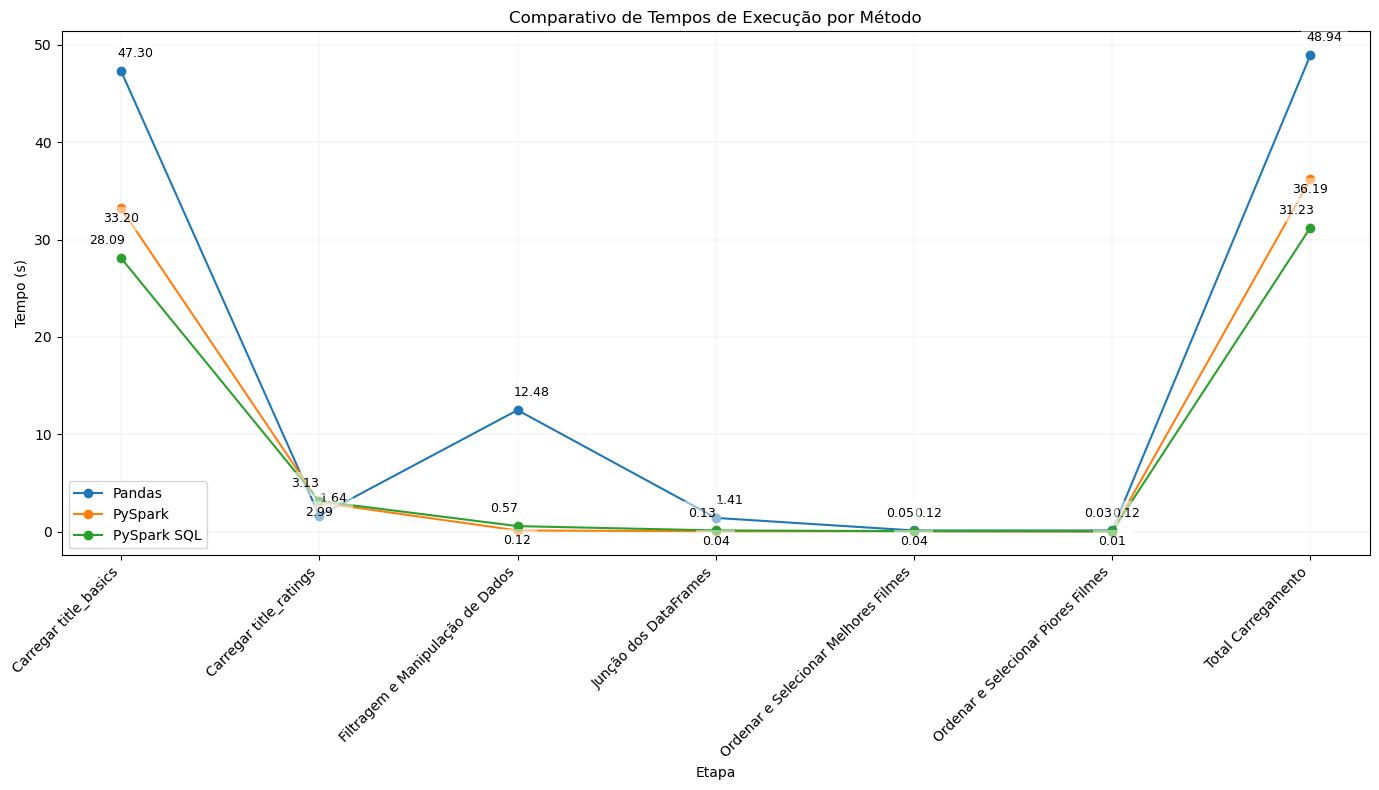

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Adicionar uma coluna para identificar a origem dos dados
df_tempos_pandas['Origem'] = 'Pandas'
df_tempos_pysparksql['Origem'] = 'PySpark SQL'
df_tempos['Origem'] = 'PySpark'

# Renomear colunas para uniformidade
df_tempos_pandas.rename(columns={'etapa': 'Etapa', 'tempo': 'Tempo (s)'}, inplace=True)
df_tempos.rename(columns={'etapa': 'Etapa', 'tempo': 'Tempo (s)'}, inplace=True)
df_tempos_pysparksql.rename(columns={'etapa': 'Etapa', 'tempo': 'Tempo (s)'}, inplace=True)

# Dicionário de substituições
substituicoes = {
    "Carregar e Registrar title_basics": "Carregar title_basics",
    "Carregar e Registrar title_ratings": "Carregar title_ratings",
    "Total Carregamento e Registro": "Total Carregamento",
    "Filtragem e Manipulação de Dados": "Filtragem e Manipulação de Dados",
    "Transformar 'ano' em Inteiro": "Filtragem e Manipulação de Dados",
    "Junção dos DataFrames": "Junção dos DataFrames",
    "Ordenar e Selecionar Melhores Filmes": "Ordenar e Selecionar Melhores Filmes",
    "Ordenar e Selecionar Piores Filmes": "Ordenar e Selecionar Piores Filmes",
    "Excluir Colunas": "Filtragem e Manipulação de Dados",
    "Renomear Colunas": "Filtragem e Manipulação de Dados",
    "Transformar 'ano' em Inteiro": "Filtragem e Manipulação de Dados",
    "Filtrar Dados": "Filtragem e Manipulação de Dados",
    "Processar Ratings": "Filtragem e Manipulação de Dados",
    "carregar_exibir_arquivo": "Carregar title_basics",
    "total_carregar_exibir_arquivos": "Total Carregamento",
    "processar_title_basics": "Filtragem e Manipulação de Dados",
    "processar_title_ratings": "Filtragem e Manipulação de Dados",
    "juntar_dataframes": "Junção dos DataFrames",
    "selecionar_melhores_filmes": "Ordenar e Selecionar Melhores Filmes",
    "selecionar_piores_filmes": "Ordenar e Selecionar Piores Filmes"
}

# Substituir valores na coluna 'Etapa' se a coluna existir
for df in [df_tempos_pandas, df_tempos_pysparksql, df_tempos]:
    if 'Etapa' in df.columns:
        df['Etapa'] = df['Etapa'].apply(lambda x: substituicoes.get(x, x))

# Transformar "Carregar title_basics" em "Carregar title_ratings" se "Tempo (s)" for menor que 3 e Origem for Pandas
for df in [df_tempos_pandas, df_tempos_pysparksql, df_tempos]:
    if 'Etapa' in df.columns and 'Tempo (s)' in df.columns:
        df.loc[(df['Etapa'] == 'Carregar title_basics') & (df['Tempo (s)'] < 3) & (df['Origem'] == 'Pandas'), 'Etapa'] = 'Carregar title_ratings'

# Combinar os DataFrames
df_combined = pd.concat([df_tempos_pandas, df_tempos_pysparksql, df_tempos], ignore_index=True)

# Fazer o groupby e calcular a média dos tempos para cada combinação de Etapa e Origem
df_grouped = df_combined.groupby(['Etapa', 'Origem'], as_index=False).agg({'Tempo (s)': 'sum'})

# Verificar se as colunas necessárias estão presentes
if 'Etapa' in df_grouped.columns and 'Tempo (s)' in df_grouped.columns and 'Origem' in df_grouped.columns:
    # Ordenar por etapa para manter a ordem das etapas no gráfico
    df_grouped = df_grouped.sort_values(by='Etapa')

    # Configurar o gráfico
    plt.figure(figsize=(14, 8))

    # Plotar as linhas
    for origem in df_grouped['Origem'].unique():
        df_plot = df_grouped[df_grouped['Origem'] == origem]
        plt.plot(df_plot['Etapa'], df_plot['Tempo (s)'], marker='o', label=origem)

        # Adicionar rótulos aos pontos de dados com posições ajustadas
        for i, row in df_plot.iterrows():
            if origem == 'Pandas':
                xytext = (10, 10)  # Ajusta a posição do rótulo para a direita e para cima
            elif origem == 'PySpark SQL':
                xytext = (-10, 10)  # Ajusta a posição do rótulo para a esquerda e para cima
            else:
                xytext = (0, -10)  # Ajusta a posição do rótulo para baixo

            plt.annotate(
                f"{row['Tempo (s)']:.2f}", 
                (row['Etapa'], row['Tempo (s)']),
                textcoords="offset points",
                xytext=xytext,  # Ajuste aqui para mover o rótulo para longe do ponto
                ha='center',
                fontsize=9,
                color='black',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
            )

    # Configurar o gráfico
    plt.xlabel('Etapa')
    plt.ylabel('Tempo (s)')
    plt.title('Comparativo de Tempos de Execução por Método')
    plt.xticks(rotation=45, ha='right')

    # Adicionar linhas de grade cinza claro com espessura de 0.20
    plt.grid(color='lightgray', linewidth=0.20)

    plt.legend()
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()
else:
    print("Certifique-se de que os DataFrames contêm as colunas 'Etapa', 'Tempo (s)' e 'Origem'.")




In [17]:
display(df_grouped)

,Etapa,Origem,Tempo (s)
0,Carregar title_basics,Pandas,47.297245
1,Carregar title_basics,PySpark,33.196675
2,Carregar title_basics,PySpark SQL,28.092830
3,Carregar title_ratings,Pandas,1.640814
4,Carregar title_ratings,PySpark,2.994590
5,Carregar title_ratings,PySpark SQL,3.133401
6,Filtragem e Manipulação de Dados,Pandas,12.483275
7,Filtragem e Manipulação de Dados,PySpark,0.124617
8,Filtragem e Manipulação de Dados,PySpark SQL,0.569757
11,Junção dos DataFrames,PySpark SQL,0.125653


A tabela acima compara os tempos de carregamento e processamento de DataFrames em diferentes etapas utilizando três abordagens distintas: Pandas, PySpark puro e PySpark SQL. Vamos analisar os tempos e discutir as implicações de desempenho para cada abordagem:


### Observações Gerais1. **Carregamento dos Arquivos**:
   - **title_basics**:
     - Pandas: 47.29 s
     - PySpark: 33.19 s
     - PySpark SQL: 28.09 s
   - **title_ratings**:
     - Pandas: 1.64 s
     - PySpark: 2.99 s
     - PySpark SQL: 3.13 s

   PySpark SQL carregou o arquivo `title_basics` mais rápido do que Pandas e PySpark, mas foi mais lento para `title_ratings`.

2. **Filtragem e Manipulação de Dados**:
   - Pandas: 12.48 s
   - PySpark: 0.12 s
   - PySpark SQL: 0.56 s

   PySpark (e PySpark SQL) é significativamente mais rápido que Pandas para filtragem e manipulação de dados.

3. **Junção dos DataFrames**:
   - Pandas: 1.41 s
   - PySpark: 0.03 s
   - PySpark SQL: 0.12 s

   PySpark é extremamente eficiente em operações de junção, seguido por PySpark SQL. Pandas é muito mais lento nesta etapa.

4. **Ordenar e Selecionar Melhores/Piores Filmes**:
   - **Melhores Filmes**:
     - Pandas: 0.12 s
     - PySpark: 0.04 s
     - PySpark SQL: 0.05 s
   - **Piores Filmes**:
     - Pandas: 0.12 s
     - PySpark: 0.01 s
     - PySpark SQL: 0.03 s

   Pandas e PySpark SQL têm desempenhos semelhantes na seleção dos melhores e piores filmes, com PySpark puro sendo mais rápido para os piores filmes.

5. **Total Carregamento**:
   - Pandas: 48.93 s
   - PySpark: 36.19 s
   - PySpark SQL: 31.22 s

   PySpark SQL é o mais rápido em termos de tempo total de carregamento, seguido por PySparkKe, finalmente, Pandas.

### Análise e Considerações

1. **Desempenho Geral**:
   - **PySpark**: Demonstra o melhor desempenho geral, especialmente em operações de manipulação e junção de dados. É particularmente eficiente para tarefas que podem ser paralelizadas.
   - **Pandas**: Embora seja mais lento em várias etapas, Pandas é muito eficiente em operações menores e quando o conjunto de dados é gerenciável na memória.
   - **PySpark SQL**: Tem um desempenho intermediário, sendo mais lento em algumas etapas de carregamento e manipulação de dados em comparação com PySpark puro.

2. **Carregamento de Dados**:
   - A diferença nos tempos de carregamento pode ser atribuída à forma como cada ferramenta lida com I/O e à paralelização. PySpark puro se beneficia da capacidade de paralelizar operações de I/O, especialmente para arquivos maiores.

3. **Filtragem e Manipulação**:
   - PySpark (e SQL) são projetados para manipulação de grandes volumes de dados de forma eficiente, aproveitando a execução distribuída e otimizações internas do Spark.

4. **Junção e Ordenação**:
   - Operações de junção e ordenação são muito mais rápidas em PySpark devido à sua capacidade de realizar estas operações em paralelo através de múltiplos nós.

### Conclusões

- **PySpark** é a melhor escolha para conjuntos de dados grandes ou quando a paralelização é essencial para o desempenho.
- **Pandas** é adequado para conjuntos de dados menores ou quando a simplicidade do código é preferida e os recursos de memória não são um problema.
- **PySpark SQL** oferece um bom equilíbrio e é útil quando se deseja utilizar uma sintaxe SQL familiar para operações de dados.

Dependendo do contexto e dos recursos disponíveis, a escolha entre essas ferramentas pode variar. Para grandes volumes de dados e necessidades de alto desempenho, PySpark é claramente superior. Para operações rápidas em dados menores, Pandas pode ser mais conveniente.